In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist =  input_data.read_data_sets('MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
X_train, y_train, X_test, y_test = (mnist.train.images / 255), mnist.train.labels, (mnist.test.images), mnist.test.labels

In [5]:
import keras

Using TensorFlow backend.


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [11]:
model = Sequential([
    Dense(512, activation='relu', kernel_initializer='uniform', bias_initializer='uniform', input_shape=(784,)),
    Dense(512, activation='relu', kernel_initializer='uniform', bias_initializer='uniform'),
    Dense(256, activation='relu', kernel_initializer='uniform', bias_initializer='uniform'),
    Dense(256, activation='relu', kernel_initializer='uniform', bias_initializer='uniform'),
    Dense(64, activation='relu', kernel_initializer='uniform', bias_initializer='uniform'),
    Dense(256, activation='relu', kernel_initializer='uniform', bias_initializer='uniform'),
    Dense(512, activation='relu', kernel_initializer='uniform', bias_initializer='uniform'),
    Dense(784, activation='softmax', kernel_initializer='uniform', bias_initializer='uniform'),
])

In [12]:
model.compile(optimizer='adam', metrics=["accuracy"], loss=keras.losses.categorical_crossentropy)

In [14]:
history = model.fit(X_train)

Instructions for updating:
Use tf.cast instead.


IndexError: list index out of range

In [15]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [16]:
encoder = Model(input_img, encoded)

In [17]:
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [27]:
autoencoder.compile(optimizer='adadelta', loss='categorical_crossentropy')

In [28]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [29]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/50
55000/55000 [==============================] - 4s 71us/step - loss: 2.3592 - val_loss: 607.1608
Epoch 2/50
55000/55000 [==============================] - 3s 56us/step - loss: 2.3491 - val_loss: 606.9196
Epoch 3/50
55000/55000 [==============================] - 4s 64us/step - loss: 2.3482 - val_loss: 606.7892
Epoch 4/50
55000/55000 [==============================] - 3s 58us/step - loss: 2.3478 - val_loss: 606.9583
Epoch 5/50
55000/55000 [==============================] - 3s 56us/step - loss: 2.3476 - val_loss: 606.8376
Epoch 6/50
55000/55000 [==============================] - 3s 54us/step - loss: 2.3475 - val_loss: 606.6149
Epoch 7/50
55000/55000 [==============================] - 3s 63us/step - loss: 2.3474 - val_loss: 606.6691
Epoch 8/50
55000/55000 [==============================] - 4s 66us/step - loss: 2.3474 - val_loss: 606.4663
Epoch 9/50
55000/55000 [==============================] - 4s 67us/step - loss: 2.3473 - val_lo

In [32]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

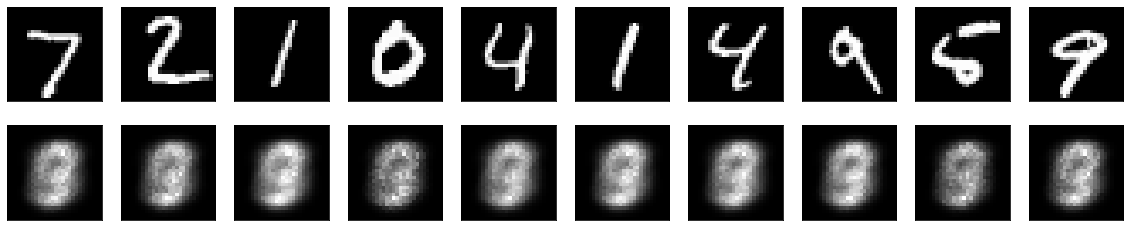

In [33]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()